In [28]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Cargar datos
orders = pd.read_csv('orders.csv')
order_products = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')

# Remover valores faltantes
orders.dropna(inplace=True)

# Crear nuevas variables, se le da el formato de hora a la columna 'order_hour_of_day'
orders['order_hour'] = pd.to_datetime(orders['order_hour_of_day'], format='%H').dt.hour

In [30]:
# Se fusiona el dataframe products con el departments utilizando como columna en común a 'department_id'
products = products.merge(departments, on='department_id', how='left')
products.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [31]:
# Se fusiona el dataframe creado anteriormente con el de order_products utilizando como columna en común a 'product_id'
order_products = order_products.merge(products, on='product_id', how='left')

order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


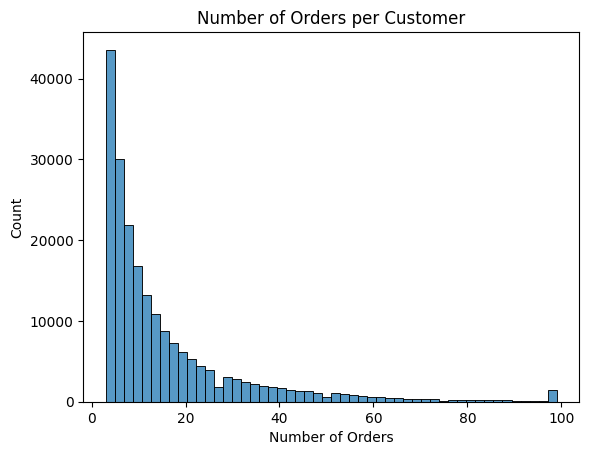

In [32]:
# Calcula el número de ordenes por cliente
orders_per_customer = orders.groupby('user_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['user_id', 'num_orders']

# Trazar un histograma del número de pedidos por cliente
sns.histplot(data=orders_per_customer, x='num_orders', bins=50)
plt.title('Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.show()

In [33]:
print(orders_per_customer)

        user_id  num_orders
0             1          10
1             2          14
2             3          12
3             4           5
4             5           4
...         ...         ...
206204   206205           3
206205   206206          67
206206   206207          16
206207   206208          49
206208   206209          13

[206209 rows x 2 columns]


### Apartir de aquí, se van creando nuevos dataframes que contienen datos que nos ayudarán a crear los clusters para hacer uso del modelo K-means y estos se van fusionando con el dataframe 'orders', después de cada fusión se hace uso del método .head() para que se pueda apreciar la fusión de los datos, además a los valores nulos se les agrega el valor default de '0'

In [34]:
# Se hace la fusión del dataframe anteriormente creado que contiene las ordenes por cliente con el dataframe orders 
orders = orders.merge(orders_per_customer, on='user_id', how='left').fillna(0)

In [35]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour,num_orders
0,2398795,1,prior,2,3,7,15.0,7,10
1,473747,1,prior,3,3,12,21.0,12,10
2,2254736,1,prior,4,4,7,29.0,7,10
3,431534,1,prior,5,4,15,28.0,15,10
4,3367565,1,prior,6,2,7,19.0,7,10


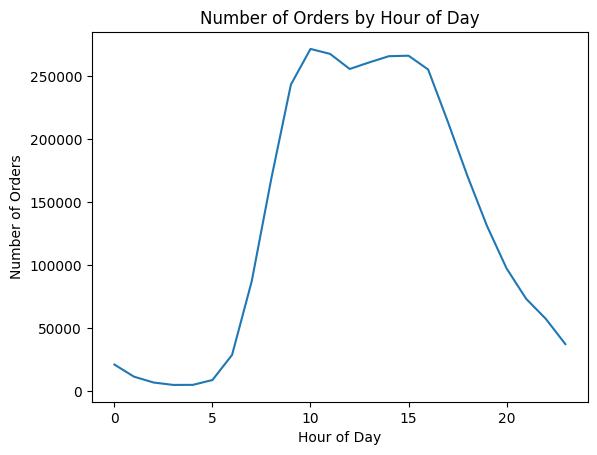

In [36]:
# Calcular el número de pedidos por hora del día
orders_by_hour = orders.groupby('order_hour')['order_id'].nunique().reset_index()
orders_by_hour.columns = ['order_hour', 'num_orders']

# Trace un gráfico lineal del número de pedidos por hora del día
sns.lineplot(data=orders_by_hour, x='order_hour', y='num_orders')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

In [37]:
print(orders_by_hour)

    order_hour  num_orders
0            0       21265
1            1       11636
2            2        7010
3            3        5117
4            4        5164
5            5        9023
6            6       28956
7            7       87227
8            8      168744
9            9      243452
10          10      271768
11          11      267812
12          12      255846
13          13      261087
14          14      266007
15          15      266375
16          16      255459
17          17      214208
18          18      171133
19          19      131383
20          20       97619
21          21       73471
22          22       57605
23          23       37507


In [38]:
# Calcular el número de productos por pedido
products_per_order = order_products.groupby('order_id')['product_id'].nunique().reset_index()
products_per_order.columns = ['order_id', 'num_products']
print(products_per_order)
orders = orders.merge(products_per_order, on='order_id', how='left').fillna(0)

        order_id  num_products
0              1             8
1             36             8
2             38             9
3             96             7
4             98            49
...          ...           ...
131204   3421049             6
131205   3421056             5
131206   3421058             8
131207   3421063             4
131208   3421070             3

[131209 rows x 2 columns]


In [39]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour,num_orders,num_products
0,2398795,1,prior,2,3,7,15.0,7,10,0.0
1,473747,1,prior,3,3,12,21.0,12,10,0.0
2,2254736,1,prior,4,4,7,29.0,7,10,0.0
3,431534,1,prior,5,4,15,28.0,15,10,0.0
4,3367565,1,prior,6,2,7,19.0,7,10,0.0


In [40]:
# Calcular el porcentaje de pedidos que incluyen productos orgánicos
organic_orders = order_products[order_products['product_name'].str.contains('Organic')].groupby('order_id')['product_id'].nunique().reset_index()
organic_orders.columns = ['order_id', 'num_organic']
organic_orders['is_organic'] = np.where(organic_orders['num_organic'] > 0, 1, 0)

print(organic_orders)
orders = orders.merge(organic_orders[['order_id', 'is_organic']], on='order_id', how='left').fillna(0)

       order_id  num_organic  is_organic
0             1            5           1
1            36            2           1
2            38            4           1
3            96            6           1
4            98           25           1
...         ...          ...         ...
93280   3420998           14           1
93281   3421026            2           1
93282   3421049            4           1
93283   3421063            2           1
93284   3421070            1           1

[93285 rows x 3 columns]


In [41]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour,num_orders,num_products,is_organic
0,2398795,1,prior,2,3,7,15.0,7,10,0.0,0.0
1,473747,1,prior,3,3,12,21.0,12,10,0.0,0.0
2,2254736,1,prior,4,4,7,29.0,7,10,0.0,0.0
3,431534,1,prior,5,4,15,28.0,15,10,0.0,0.0
4,3367565,1,prior,6,2,7,19.0,7,10,0.0,0.0


In [42]:
# Calcula el porcentaje de pedidos que incluyen productos perecederos
perishable_orders = order_products[order_products['department'].isin(['produce', 'dairy', 'eggs', 'meat', 'bakery'])].groupby('order_id')['product_id'].nunique().reset_index()
perishable_orders.columns = ['order_id', 'num_perishable']
perishable_orders['is_perishable'] = np.where(perishable_orders['num_perishable'] > 0, 1, 0)

print(perishable_orders)
orders = orders.merge(perishable_orders[['order_id', 'is_perishable']], on='order_id', how='left').fillna(0)


        order_id  num_perishable  is_perishable
0              1               4              1
1             36               3              1
2             38               6              1
3             96               4              1
4             98               8              1
...          ...             ...            ...
102863   3420998              13              1
102864   3421026               1              1
102865   3421049               3              1
102866   3421056               1              1
102867   3421070               1              1

[102868 rows x 3 columns]


In [43]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour,num_orders,num_products,is_organic,is_perishable
0,2398795,1,prior,2,3,7,15.0,7,10,0.0,0.0,0.0
1,473747,1,prior,3,3,12,21.0,12,10,0.0,0.0,0.0
2,2254736,1,prior,4,4,7,29.0,7,10,0.0,0.0,0.0
3,431534,1,prior,5,4,15,28.0,15,10,0.0,0.0,0.0
4,3367565,1,prior,6,2,7,19.0,7,10,0.0,0.0,0.0


In [44]:
# Calcular el porcentaje de pedidos que incluyen productos de un solo departamento
single_department_orders = order_products.groupby('order_id')['department'].nunique().reset_index()
single_department_orders.columns = ['order_id', 'num_departments']
single_department_orders['is_single_department'] = np.where(single_department_orders['num_departments'] == 1, 1, 0)

print(single_department_orders)
orders = orders.merge(single_department_orders[['order_id', 'is_single_department']], on='order_id', how='left').fillna(0)

        order_id  num_departments  is_single_department
0              1                3                     0
1             36                4                     0
2             38                4                     0
3             96                3                     0
4             98               12                     0
...          ...              ...                   ...
131204   3421049                5                     0
131205   3421056                5                     0
131206   3421058                6                     0
131207   3421063                4                     0
131208   3421070                3                     0

[131209 rows x 3 columns]


In [45]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour,num_orders,num_products,is_organic,is_perishable,is_single_department
0,2398795,1,prior,2,3,7,15.0,7,10,0.0,0.0,0.0,0.0
1,473747,1,prior,3,3,12,21.0,12,10,0.0,0.0,0.0,0.0
2,2254736,1,prior,4,4,7,29.0,7,10,0.0,0.0,0.0,0.0
3,431534,1,prior,5,4,15,28.0,15,10,0.0,0.0,0.0,0.0
4,3367565,1,prior,6,2,7,19.0,7,10,0.0,0.0,0.0,0.0


Algunos valores son nulos porque no cumplen con las características necesarias de cada caso para ser considerados un producto válido, en el caso de los productos orgánicos, el producto no incluye la palabra 'Organic' por lo que se le consideraría un valor nulo, por eso se le agrega el valor de '0'

c:\Users\hinoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hinoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hinoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hinoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

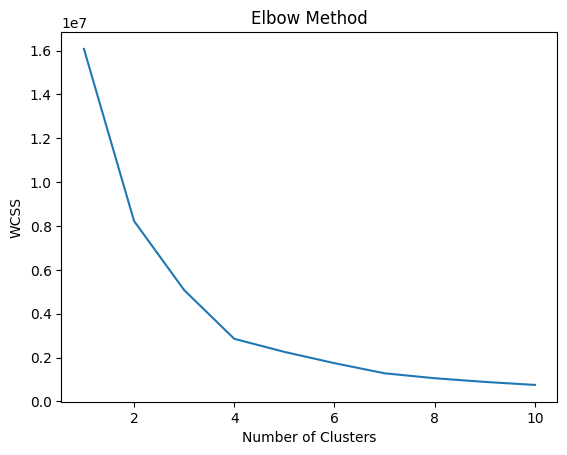

In [46]:
# Import KMeans and StandardScaler libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Se selecciona del dataframe orders las columnas que usaremos para calcular los clusters de nuestro modelo
X = orders[['num_orders', 'num_products', 'is_organic', 'is_perishable', 'is_single_department']]

# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clústeres
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Se utilizará la cantidad de 4 clusters

In [47]:
# Ajustar modelo de agrupamiento k-means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Asignar clústeres a clientes
orders['cluster'] = kmeans.labels_

c:\Users\hinoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


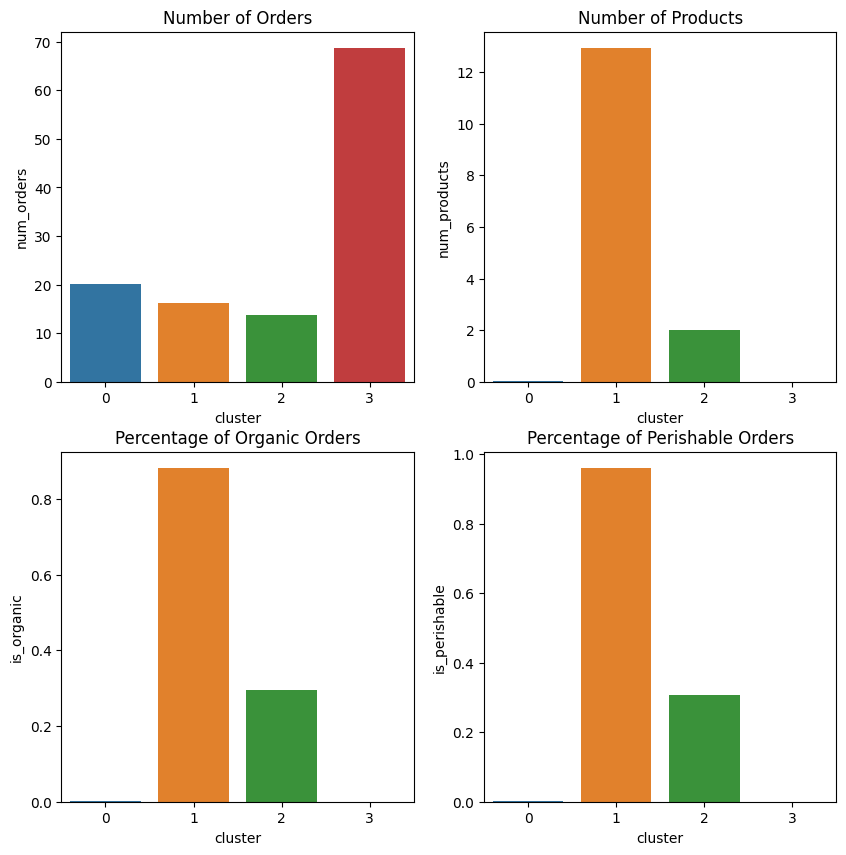

In [48]:

# Calcular valores promedio para cada variable por clúster
cluster_summary = orders.groupby('cluster').agg({'num_orders': 'mean', 'num_products': 'mean', 'is_organic': 'mean', 'is_perishable': 'mean', 'is_single_department': 'mean'}).reset_index()

# Trazar gráficos de barras de valores promedio por grupo
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(data=cluster_summary, x='cluster', y='num_orders', ax=axs[0, 0])
axs[0, 0].set_title('Number of Orders')
sns.barplot(data=cluster_summary, x='cluster', y='num_products', ax=axs[0, 1])
axs[0, 1].set_title('Number of Products')
sns.barplot(data=cluster_summary, x='cluster', y='is_organic', ax=axs[1, 0])
axs[1, 0].set_title('Percentage of Organic Orders')
sns.barplot(data=cluster_summary, x='cluster', y='is_perishable', ax=axs[1, 1])
axs[1, 1].set_title('Percentage of Perishable Orders')
plt.show()

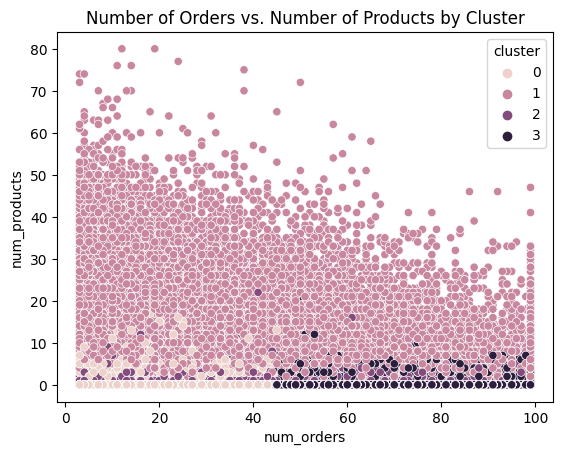

In [49]:
# Trace un diagrama de dispersión de la cantidad de pedidos frente a la cantidad de productos por grupo
sns.scatterplot(data=orders, x='num_orders', y='num_products', hue='cluster')
plt.title('Number of Orders vs. Number of Products by Cluster')
plt.show()